# 3. Exploratory Data Analysis (EDA)

In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [14]:
df = pd.read_csv("D:/Kevin Osioma/data/raw_listings_data.csv")

# More_Cleaning

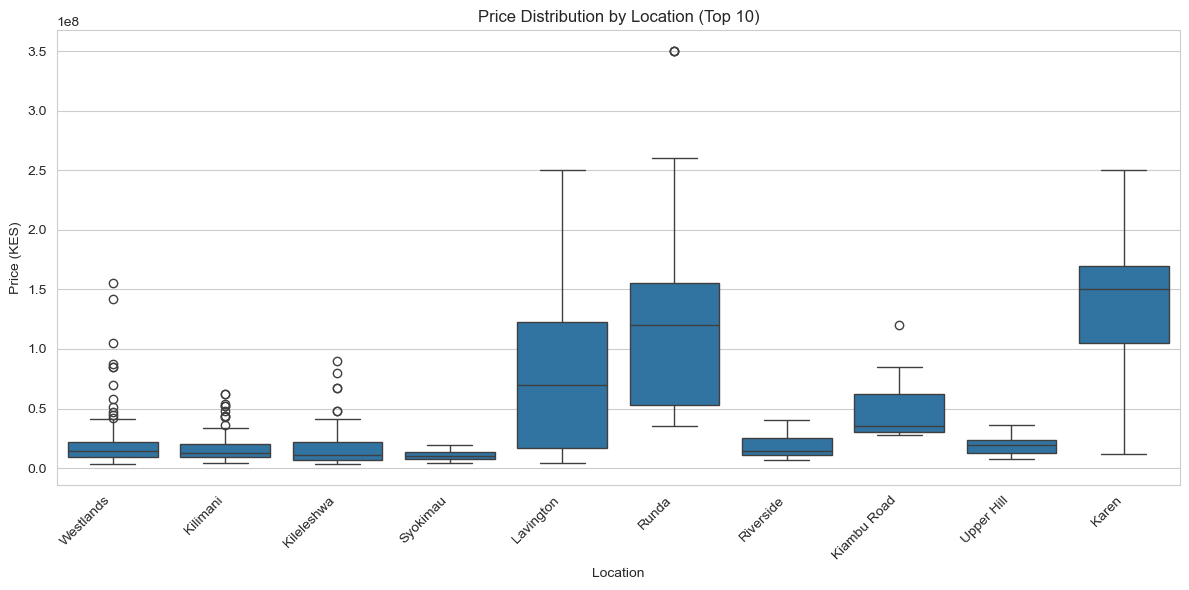

In [15]:
# Price distribution by location (top 10)
top_10_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_10_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='location', y='price_kes', order=top_10_locations)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (KES)')
plt.xlabel('Location')
plt.title('Price Distribution by Location (Top 10)')
plt.tight_layout()
plt.savefig("price_distibution_by_location.png")
plt.show()

In [16]:
# Median price by location
median_by_location = df.groupby('location')['price_kes'].median().sort_values(ascending=False)
print("\nTop 5 Most Expensive Locations (by median price):")
for i, (loc, price) in enumerate(median_by_location.head().items(), 1):
    print(f"{i}. {loc}: KSh {price:,.0f}")



Top 5 Most Expensive Locations (by median price):
1. Nyari: KSh 180,000,000
2. Karen: KSh 150,000,000
3. Muthaiga: KSh 150,000,000
4. Muthaiga North: KSh 120,000,000
5. Runda: KSh 120,000,000


# How Strongly Does Size Affect Price?


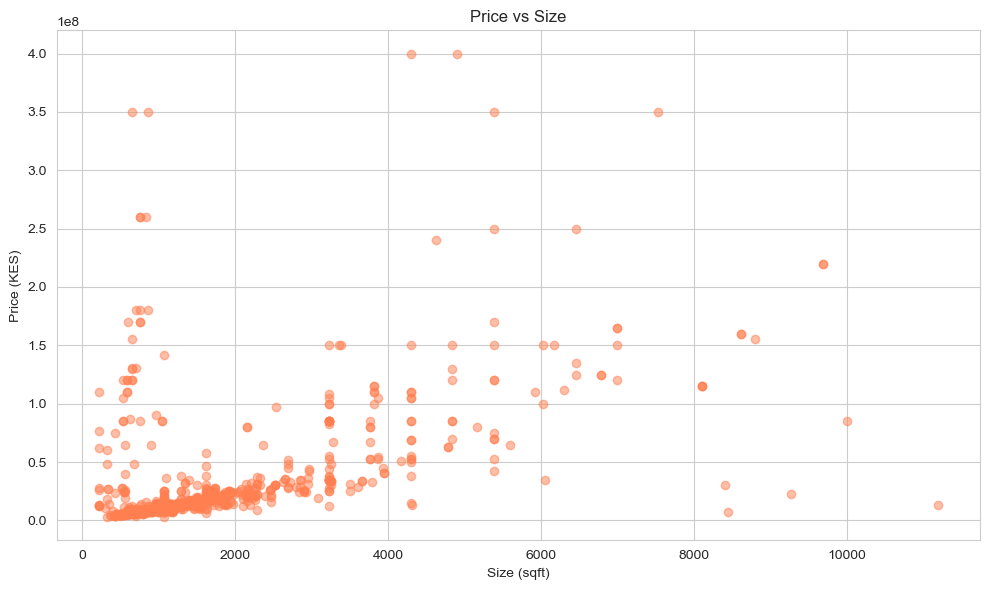

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(df['size_sqft'], df['price_kes'], alpha=0.5, color='coral')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (KES)')
plt.title('Price vs Size')
plt.tight_layout()
plt.savefig("price_by_size.png")
plt.show()

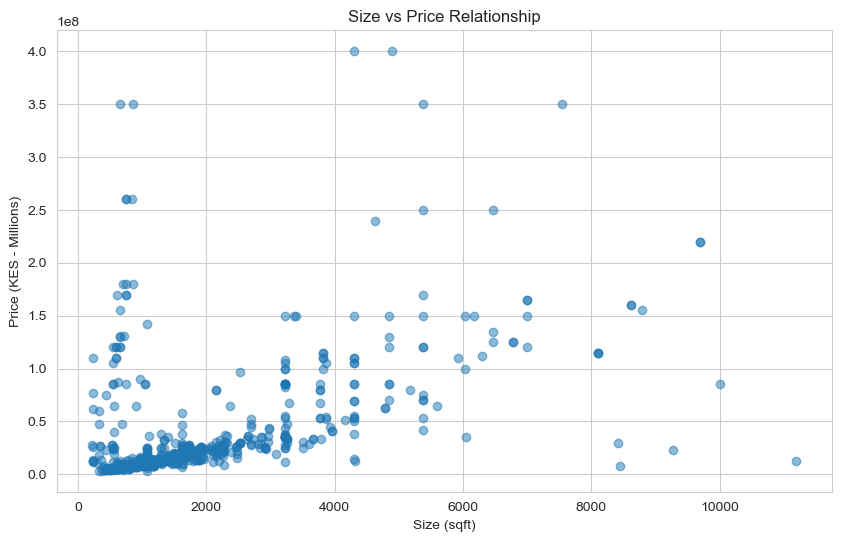

In [18]:
# 2. Size vs Price scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['size_sqft'], df['price_kes'], alpha=0.5)
plt.xlabel('Size (sqft)')
plt.ylabel('Price (KES - Millions)')
plt.title('Size vs Price Relationship')
plt.savefig("size_by_price reletionship.png")
plt.show()

# Price By Number of Bedrooms

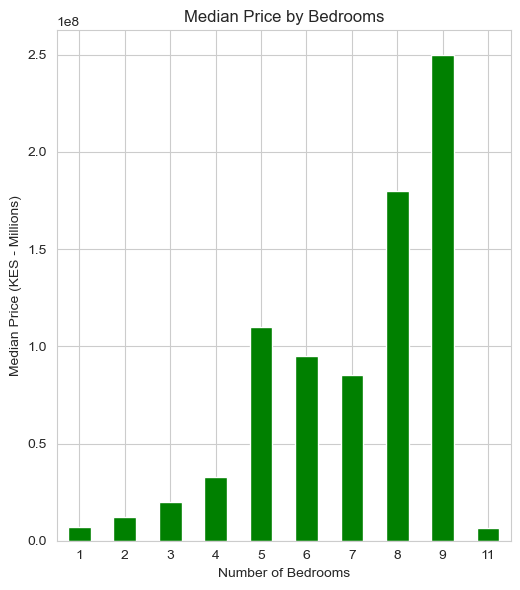

In [19]:
#Median price by bedrooms

plt.subplot(1, 2, 1)
df.groupby('bedrooms')['price_kes'].median().plot(kind='bar', color='green')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price (KES - Millions)')
plt.title('Median Price by Bedrooms')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("median_price_by_bedrooms.png")
plt.show()



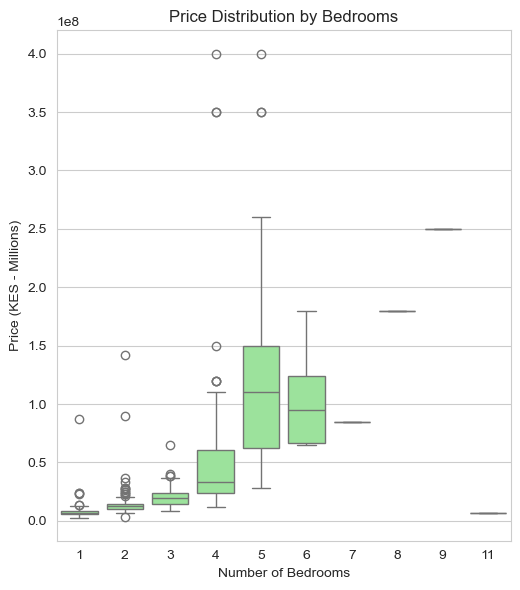

In [20]:

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='bedrooms', y='price_kes', color='lightgreen')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (KES - Millions)')
plt.title('Price Distribution by Bedrooms')

plt.tight_layout()
plt.savefig("price distribution_by_bedrooms.png")
plt.show()

# Price Per SQ_FT By Location

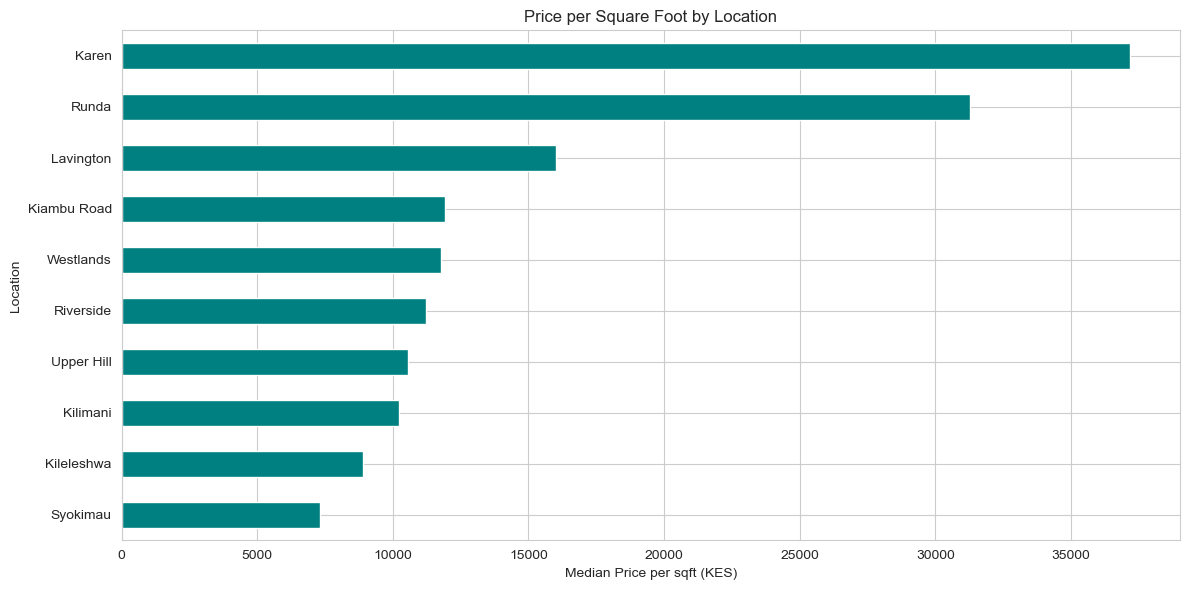

In [21]:
top_locs = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locs)]

plt.figure(figsize=(12, 6))
price_per_sqft_by_loc = df_top.groupby('location')['price_per_sqft'].median().sort_values()
price_per_sqft_by_loc.plot(kind='barh', color='teal')
plt.xlabel('Median Price per sqft (KES)')
plt.ylabel('Location')
plt.title('Price per Square Foot by Location')
plt.tight_layout()
plt.savefig("price_per_square_by_foot_location.png")
plt.show()


In [22]:
# Check the data quality
print("Price distribution:")
print(df['price_kes'].describe())

print("\nProperties > 100M:")
print(len(df[df['price_kes'] > 100_000_000]))

print("\nMissing size_sqft:")
print(df['size_sqft'].isna().sum())

print("\nPrice per sqft outliers:")
print(df['price_per_sqft'].describe())

Price distribution:
count    7.590000e+02
mean     3.504095e+07
std      5.160380e+07
min      2.810000e+06
25%      9.500000e+06
50%      1.520000e+07
75%      3.045000e+07
max      4.000000e+08
Name: price_kes, dtype: float64

Properties > 100M:
74

Missing size_sqft:
0

Price per sqft outliers:
count       759.000000
mean      24873.682625
std       52080.889413
min         887.601275
25%        9391.181465
50%       11281.064402
75%       14765.418322
max      541963.456178
Name: price_per_sqft, dtype: float64
